In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds_name = "Bergamaschi"

In [3]:
df = pd.read_csv(f'results/{ds_name}_approximators_0.csv')

In [4]:
for i in range(1, 30):
    df = pd.concat([df, pd.read_csv(f'results/{ds_name}_approximators_{i}.csv')])

In [45]:
# Rename approximator labels for better readability
df['approximator'] = df['approximator'].replace({
    'montecarlo': 'Monte Carlo',
    'svarm': 'SVARM',
    'permutation': 'Permutation',
    'regression': 'Regression'
})

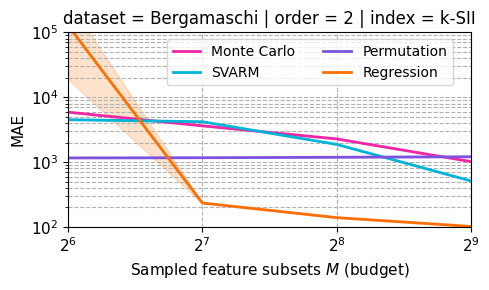

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.lineplot(
    df.loc[df.budget >= 2**6, :], 
    x="budget", 
    y="error", 
    hue="approximator", 
    errorbar="se", 
    # palette="Set2",
    palette=['#ef27a6', '#00b4d8', '#7d53de', '#ff6f00'],
    linewidth=2, 
    ax=ax
)
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
# ax.set_ylim(0, 8000)
ax.set_xlim(64, 512)
ax.set_ylim(10**2, 10**5)
ax.set_xlabel("Sampled feature subsets $M$ (budget)", fontsize=11)
ax.set_ylabel("MAE", fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=11)
plt.grid(True, which="both", ls="--")
plt.title(f'dataset = {ds_name} | order = 2 | index = k-SII')
plt.legend(bbox_to_anchor=(0.6, 1.0), loc='upper center', ncol=2)
plt.tight_layout()
plt.savefig(f'results/{ds_name}_approximators_benchmark.pdf', bbox_inches="tight", pad_inches=0.01)

In [15]:
df.loc[(df.approximator=="montecarlo") & (df.budget==128)]

,approximator,budget,error,seed
2,montecarlo,128.0,3671.296462,0
2,montecarlo,128.0,3633.124167,1
2,montecarlo,128.0,3566.807604,2
2,montecarlo,128.0,3433.958158,3
2,montecarlo,128.0,3770.478891,4
2,montecarlo,128.0,3748.970585,5
2,montecarlo,128.0,3699.394858,6
2,montecarlo,128.0,3482.272409,7
2,montecarlo,128.0,3582.495144,8
2,montecarlo,128.0,3566.842170,9
